<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_3_2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.2_n250.csv',
 'data_multi_delta_-3.2_n120.csv',
 'data_multi_delta_-3.2_n60.csv',
 'data_multi_delta_-3.2_n30.csv',
 'data_multi_delta_-3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.179627,-0.000719,41.178908,41.182047,-0.003140
1,0.0,1.0,81.644364,0.000586,91.644950,91.643370,0.001580
2,0.0,2.0,22.513644,0.010252,32.523896,32.516651,0.007245
3,0.0,3.0,33.027870,0.001074,43.028944,43.030166,-0.001222
4,0.0,4.0,54.454157,-0.002720,64.451437,64.455003,-0.003566
...,...,...,...,...,...,...,...
29995,999.0,25.0,69.672943,0.002589,79.675532,79.672603,0.002929
29996,999.0,26.0,58.229240,-0.001284,68.227956,68.229734,-0.001777
29997,999.0,27.0,46.669367,0.000185,56.669552,56.670704,-0.001152
29998,999.0,28.0,57.671103,-0.001285,67.669818,67.671637,-0.001819


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.179627,-0.000719,41.178908,41.182047,-0.003140
1,0.0,1.0,81.644364,0.000586,91.644950,91.643370,0.001580
2,0.0,2.0,22.513644,0.010252,32.523896,32.516651,0.007245
3,0.0,3.0,33.027870,0.001074,43.028944,43.030166,-0.001222
4,0.0,4.0,54.454157,-0.002720,64.451437,64.455003,-0.003566
...,...,...,...,...,...,...,...
29995,999.0,25.0,69.672943,0.002589,79.675532,79.672603,0.002929
29996,999.0,26.0,58.229240,-0.001284,68.227956,68.229734,-0.001777
29997,999.0,27.0,46.669367,0.000185,56.669552,56.670704,-0.001152
29998,999.0,28.0,57.671103,-0.001285,67.669818,67.671637,-0.001819


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    31.179627 -0.000719  41.178908  41.182047 -0.003140
      1.0    81.644364  0.000586  91.644950  91.643370  0.001580
      2.0    22.513644  0.010252  32.523896  32.516651  0.007245
      3.0    33.027870  0.001074  43.028944  43.030166 -0.001222
      4.0    54.454157 -0.002720  64.451437  64.455003 -0.003566
...                ...       ...        ...        ...       ...
999.0 25.0   69.672943  0.002589  79.675532  79.672603  0.002929
      26.0   58.229240 -0.001284  68.227956  68.229734 -0.001777
      27.0   46.669367  0.000185  56.669552  56.670704 -0.001152
      28.0   57.671103 -0.001285  67.669818  67.671637 -0.001819
      29.0   66.425137 -0.001506  76.423630  76.425033 -0.001403

[30000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    31.179627 -0.000719  41.178908  41.182047 -0.003140
      1.0    81.644364  0.000586  91.644950  91.643370  0.001580
      2.0    22.513644  0.010252  32.523896  32.516651  0.007245
      3.0    33.027870  0.001074  43.028944  43.030166 -0.001222
      4.0    54.454157 -0.002720  64.451437  64.455003 -0.003566
...                ...       ...        ...        ...       ...
999.0 25.0   69.672943  0.002589  79.675532  79.672603  0.002929
      26.0   58.229240 -0.001284  68.227956  68.229734 -0.001777
      27.0   46.669367  0.000185  56.669552  56.670704 -0.001152
      28.0   57.671103 -0.001285  67.669818  67.671637 -0.001819
      29.0   66.425137 -0.001506  76.423630  76.425033 -0.001403

[30000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.179627,-0.000719,41.178908,41.182047,-0.003140
1,0.0,1.0,81.644364,0.000586,91.644950,91.643370,0.001580
2,0.0,2.0,22.513644,0.010252,32.523896,32.516651,0.007245
3,0.0,3.0,33.027870,0.001074,43.028944,43.030166,-0.001222
4,0.0,4.0,54.454157,-0.002720,64.451437,64.455003,-0.003566
...,...,...,...,...,...,...,...
29995,999.0,25.0,69.672943,0.002589,79.675532,79.672603,0.002929
29996,999.0,26.0,58.229240,-0.001284,68.227956,68.229734,-0.001777
29997,999.0,27.0,46.669367,0.000185,56.669552,56.670704,-0.001152
29998,999.0,28.0,57.671103,-0.001285,67.669818,67.671637,-0.001819


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    31.179627 -0.000719  41.178908  41.182047 -0.003140
      1.0    81.644364  0.000586  91.644950  91.643370  0.001580
      2.0    22.513644  0.010252  32.523896  32.516651  0.007245
      3.0    33.027870  0.001074  43.028944  43.030166 -0.001222
      4.0    54.454157 -0.002720  64.451437  64.455003 -0.003566
...                ...       ...        ...        ...       ...
999.0 25.0   69.672943  0.002589  79.675532  79.672603  0.002929
      26.0   58.229240 -0.001284  68.227956  68.229734 -0.001777
      27.0   46.669367  0.000185  56.669552  56.670704 -0.001152
      28.0   57.671103 -0.001285  67.669818  67.671637 -0.001819
      29.0   66.425137 -0.001506  76.423630  76.425033 -0.001403

[30000 rows x 5 columns]

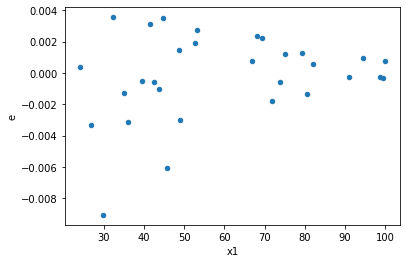

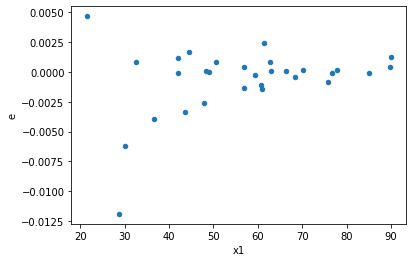

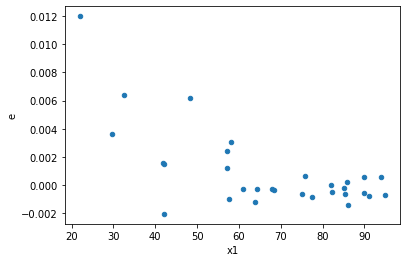

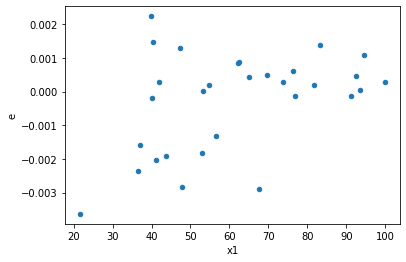

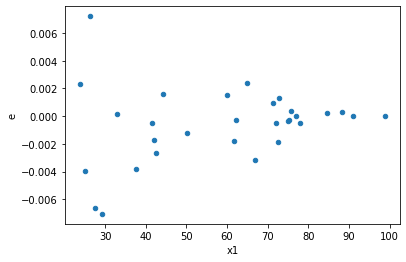

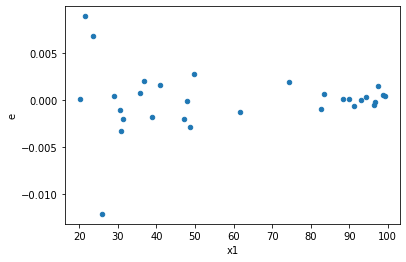

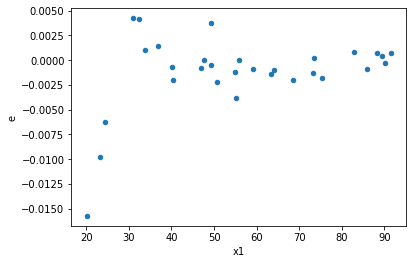

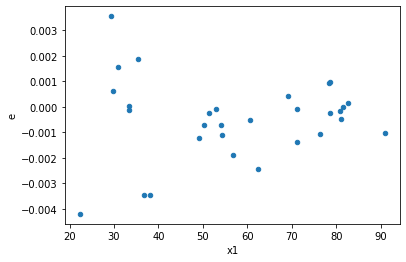

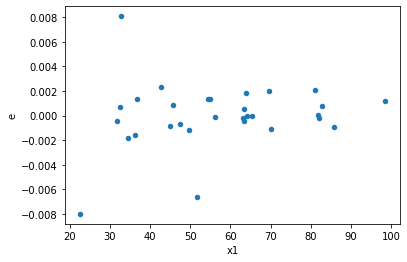

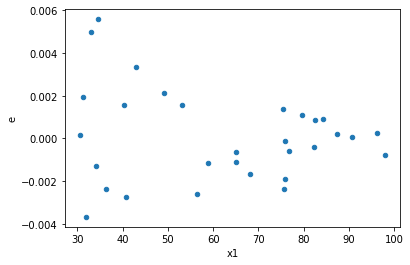

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,11.0,8.455779774208091e-05,9.275740569225683e-06,7.687072522007355e-06,8.432491426568803e-07,0.1096970452981598,0.0009663892139204572,Reject005=0 : Heteroscedasticity
1.0,11.0,11.0,8.387703573822093e-05,4.25674436836957e-06,7.625185067110994e-06,3.8697676076087e-07,0.050749818837837926,2.3065575512016766e-05,Reject005=0 : Heteroscedasticity
2.0,11.0,11.0,0.00030762621774740325,1.0796124902343757e-05,2.7966019795218476e-05,9.814659002130688e-07,0.03509494405710448,3.486230548682803e-06,Reject005=0 : Heteroscedasticity
3.0,11.0,11.0,0.00012290119227812858,4.023345634407762e-06,1.1172835661648054e-05,3.6575869403706927e-07,0.03273642476390975,2.4287061926374712e-06,Reject005=0 : Heteroscedasticity
4.0,11.0,11.0,0.0002541527265973771,1.1067219997667416e-05,2.310479332703428e-05,1.006110908878856e-06,0.043545548953326206,1.0591418585470206e-05,Reject005=0 : Heteroscedasticity
5.0,11.0,11.0,5.492739007743778e-05,3.8557156757706725e-06,4.9933990979488894e-06,3.5051960688824294e-07,0.07019659354531144,0.0001159046434550749,Reject005=0 : Heteroscedasticity
6.0,11.0,11.0,0.00016011138685112766,1.4413023343304954e-05,1.4555580622829788e-05,1.3102748493913594e-06,0.09001872775423682,0.00038420345449068446,Reject005=0 : Heteroscedasticity
7.0,11.0,11.0,0.0002142154069372314,5.542705214615621e-06,1.9474127903384675e-05,5.038822922377837e-07,0.025874447099128232,7.085480148914309e-07,Reject005=0 : Heteroscedasticity
8.0,11.0,11.0,9.160790407187302e-05,7.271904495681681e-06,8.327991279261183e-06,6.610822268801528e-07,0.07938075397922374,0.00021061784751438335,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    977
Reject005=1 : Homoscedasticity       23
Name: Result_test, dtype: int64